# Detecting Parkinson's Disease

In [1]:
#importing

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score


In [2]:
#converting dataset to .csv format

dataset=pd.read_csv(r'C:\Users\Aditi\Desktop\Projects\Parkinson-s Disease\parkinsons.data') 
dataset.to_csv (r'C:\Users\Aditi\Desktop\Projects\Parkinson-s Disease\parkinsons.csv', index=None)

In [3]:
dataset.shape

(195, 24)

In [4]:
dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
dataset.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
dataset['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [9]:
dataset.value_counts()

name            MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  NHR      HNR     status  RPDE      DFA       spread1    spread2   D2        PPE     
phon_R01_S01_1  119.992      157.302       74.997        0.00784         0.00007           0.00370   0.00554   0.01109     0.04374       0.426             0.02182       0.03130       0.02971   0.06545      0.02211  21.033  1       0.414783  0.815285  -4.813031  0.266482  2.301442  0.284654    1
phon_R01_S35_1  169.774      191.759       151.451       0.01568         0.00009           0.00863   0.00946   0.02589     0.08143       0.821             0.03804       0.05426       0.08808   0.11411      0.07530  12.359  1       0.561610  0.793509  -3.297668  0.414758  3.413649  0.457533    1
phon_R01_S31_3  156.239      195.107       79.820        0.00694         0.00004           0.00403   0.00395   0.0120

In [10]:
dataset.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [11]:
dataset.groupby('status').median()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,198.996,231.1615,113.9385,0.003355,0.000025,0.001625,0.001775,0.004875,0.016705,0.154,...,0.013015,0.02633,0.004825,24.997,0.435368,0.682527,-6.826448,0.167356,2.129510,0.115118
1,145.174,163.3350,99.7700,0.005440,0.000040,0.002840,0.003140,0.008530,0.028380,0.263,...,0.021570,0.04451,0.016580,21.414,0.530529,0.726652,-5.440040,0.240875,2.439597,0.222716


In [12]:
dataset.groupby('status').agg(['mean','median'])

MDVP:Fo(Hz)          MDVP:Fhi(Hz)           MDVP:Flo(Hz)            \
              mean   median         mean    median         mean    median   
status                                                                      
0       181.937771  198.996   223.636750  231.1615   145.207292  113.9385   
1       145.180762  145.174   188.441463  163.3350   106.893558   99.7700   

       MDVP:Jitter(%)           MDVP:Jitter(Abs)            ...       DFA  \
                 mean    median             mean    median  ...      mean   
status                                                      ...             
0            0.003866  0.003355         0.000023  0.000025  ...  0.695716   
1            0.006989  0.005440         0.000051  0.000040  ...  0.725408   

                   spread1             spread2                  D2            \
          median      mean    median      mean    median      mean    median   
status                                                                         
0       0.682527 -6.759264 -6.826448  0.160292  0.167356  2.154491  2.129510   
1       0.726652 -5.333420 -5.440040  0.248133  0.240875  2.456058  2.439597   

             PPE            
            mean    median  
status                      
0       0.123017  0.115118  
1       0.233828  0.222716  

[2 rows x 44 columns]

Pre-Processing the data

In [13]:
x=dataset.drop(columns=['name','status'],axis=1)
y=dataset['status']

In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [15]:
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDE              195 non-null    float64
 1

In [17]:
scaler=StandardScaler()

In [18]:
scaler.fit(x)

StandardScaler()

In [19]:
x=scaler.transform(x)

In [20]:
x

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

In [21]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

# Model Fitting

## SVC

In [22]:
from sklearn import svm

In [23]:
model=svm.SVC(kernel='linear')

In [24]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [25]:
#accuracy of model on training data
x_train_result=model.predict(x_train)

In [26]:
train_accuracy=accuracy_score(y_train,x_train_result)

In [27]:
train_accuracy

0.8974358974358975

In [28]:
model.fit(x_test,y_test)

SVC(kernel='linear')

In [29]:
x_test_result=model.predict(x_test)

In [30]:
test_accuracy=accuracy_score(y_test,x_test_result)

In [31]:
test_accuracy

0.9743589743589743

In [32]:
#Using confusion matrix
from sklearn import metrics

In [33]:
print(metrics.confusion_matrix(y_test, x_test_result))

[[10  1]
 [ 0 28]]


In [34]:
print(metrics.classification_report(y_test,x_test_result))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.97      1.00      0.98        28

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39



## KNN Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
x_train_result=model.predict(x_train)

In [38]:
train_accuracy=accuracy_score(y_train,x_train_result)

In [39]:
train_accuracy

0.9743589743589743

In [40]:
model.fit(x_test,y_test)

KNeighborsClassifier(n_neighbors=3)

In [41]:
x_test_result=model.predict(x_test)

In [42]:
test_accuracy=accuracy_score(y_test,x_test_result)

In [43]:
test_accuracy

0.9487179487179487

In [44]:
print(metrics.confusion_matrix(y_test, x_test_result))

[[ 9  2]
 [ 0 28]]


In [45]:
print(metrics.classification_report(y_test,x_test_result))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.93      1.00      0.97        28

    accuracy                           0.95        39
   macro avg       0.97      0.91      0.93        39
weighted avg       0.95      0.95      0.95        39



## Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [47]:
model=DecisionTreeClassifier(max_depth = 3, random_state = 1)

In [48]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [49]:
x_train_result=model.predict(x_train)

In [50]:
train_accuracy=accuracy_score(y_train,x_train_result)

In [51]:
train_accuracy

0.9487179487179487

In [52]:
model.fit(x_test,y_test)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [53]:
x_test_result=model.predict(x_test)

In [54]:
test_accuracy=accuracy_score(y_test,x_test_result)

In [55]:
test_accuracy

0.9743589743589743

In [56]:
print(metrics.confusion_matrix(y_test,x_test_result))

[[11  0]
 [ 1 27]]


In [57]:
print(metrics.classification_report(y_test,x_test_result))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.96      0.98        28

    accuracy                           0.97        39
   macro avg       0.96      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39



## Gaussian NB Classifier

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
model=GaussianNB()

In [60]:
model.fit(x_train,y_train)

GaussianNB()

In [61]:
x_train_result=model.predict(x_train)

In [62]:
train_accuracy=accuracy_score(y_train,x_train_result)

In [63]:
train_accuracy

0.6730769230769231

In [64]:
model.fit(x_test,y_test)

GaussianNB()

In [65]:
x_test_result=model.predict(x_test)

In [66]:
test_accuracy=accuracy_score(y_test,x_test_result)

In [67]:
test_accuracy

0.8974358974358975

In [68]:
print(metrics.confusion_matrix(y_test,x_test_result))

[[10  1]
 [ 3 25]]


In [69]:
print(metrics.classification_report(y_test,x_test_result))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.96      0.89      0.93        28

    accuracy                           0.90        39
   macro avg       0.87      0.90      0.88        39
weighted avg       0.91      0.90      0.90        39



## Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
model=LogisticRegression()

In [72]:
model.fit(x_train,y_train)

LogisticRegression()

In [73]:
x_train_result=model.predict(x_train)

In [74]:
train_accuracy=accuracy_score(y_train,x_train_result)

In [75]:
train_accuracy

0.8525641025641025

In [76]:
model.fit(x_test,y_test)

LogisticRegression()

In [77]:
x_test_result=model.predict(x_test)

In [78]:
test_accuracy=accuracy_score(y_test,x_test_result)

In [79]:
test_accuracy

0.9743589743589743

In [80]:
print(metrics.confusion_matrix(y_test,x_test_result))

[[10  1]
 [ 0 28]]


In [81]:
print(metrics.classification_report(y_test,x_test_result))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.97      1.00      0.98        28

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39



Hence, Decision Tree Classifier is best suited.

In [82]:
from sklearn import tree

In [83]:
model=DecisionTreeClassifier(max_depth = 3, random_state = 1)

In [84]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [85]:
model.fit(x_test,y_test)

DecisionTreeClassifier(max_depth=3, random_state=1)

[Text(223.20000000000002, 190.26, 'X[18] <= -0.575\ngini = 0.405\nsamples = 39\nvalue = [11, 28]'),
 Text(167.4, 135.9, 'X[20] <= 0.31\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(111.60000000000001, 81.53999999999999, 'X[19] <= -0.252\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(55.800000000000004, 27.180000000000007, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(167.4, 27.180000000000007, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(279.0, 135.9, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]')]

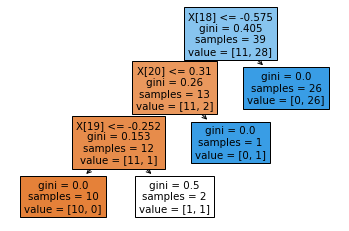

In [86]:
tree.plot_tree(model,filled=True)

# Predicitng Model

In [87]:
Fo=input("Enter the field")         
Fhi=input("Enter the field")    
Flo=input("Enter the field")        
Jitter=input("Enter the field")     
Jitter_abs=input("Enter the field")   
RAP=input("Enter the field")            
PPQ=input("Enter the field")           
DDP=input("Enter the field")          
Shimmer=input("Enter the field")        
Shimmer_db=input("Enter the field")    
APQ3=input("Enter the field")        
APQ5=input("Enter the field")        
APQ=input("Enter the field")            
DDA=input("Enter the field")         
NHR=input("Enter the field")                 
HNR=input("Enter the field")                             
RPDE=input("Enter the field")                
DFA=input("Enter the field")                 
spread1=input("Enter the field")             
spread2=input("Enter the field")             
D2=input("Enter the field")               
PPE=input("Enter the field")         


Enter the field202.26600
Enter the field211.60400
Enter the field197.07900
Enter the field0.00180
Enter the field0.000009
Enter the field0.00093
Enter the field0.00107
Enter the field0.00278
Enter the field0.00954
Enter the field0.08500
Enter the field0.00469
Enter the field0.00606
Enter the field0.00719
Enter the field0.01407
Enter the field0.00072
Enter the field32.68400
Enter the field0.368535
Enter the field0.742133
Enter the field-7.695734
Enter the field0.178540
Enter the field1.544609
Enter the field0.056141


In [94]:
data=(Fo,Fhi,Flo,Jitter,Jitter_abs,RAP,PPQ,DDP,Shimmer,Shimmer_db,APQ3,APQ5,APQ,DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE)                         

In [95]:
#making data into a numpy array
data=np.asarray(data)

In [96]:
#reshaping the data
data=data.reshape(1,-1)

In [97]:
#Standardizing the data
#data=scaler.fit(data)

In [98]:
data=scaler.transform(data)

C:\Users\Aditi\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [99]:
prediction=model.predict(data)

In [100]:
prediction

array([0], dtype=int64)

In [101]:
if(prediction[0]==0):
    print("Patient is healthy")
else:
    print("Patient has Parkinson's Disease")

Patient is healthy


In [102]:
import pickle

In [103]:
pickle.dump(model, open('Parkinson-s Disease Detection.pkl','wb'))